In [1]:
# Load important packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Project Name: HR Analytics with Employee Attrition Predictions

## How does Attrition affect companies? 

- A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new    hire training are some of the common expenses of losing employees and replacing them. 
    
## how does HR Analytics help in analyzing attrition:-

- Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to     the human resource department of an organization in the hope of improving employee performance and therefore getting a better   return on investment.
- Understanding why and when employees are most likely to leave company, it can lead to actions to improve employee retention     as well as possibly planning new hiring in advance.
- it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to        improve employee performance and therefore getting a better return on investment.

## The Main Objective of this project is to Predict the Probability of an employee leaving the company and also give understanding why and when most employees leave their job.

- this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former       employee). In this study, our target variable Y is the probability of an employee leaving the company.
    

# Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variabl
- finding and removing outliers

In [2]:
# let's first we load the Dataset
hr = pd.read_csv('hr_employees_attrition.csv')
hr


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# let's check the shape of the dataset

hr.shape

# The dataset holds 1,470 rows and 35 columns.

(1470, 35)

In [4]:
type(hr)

pandas.core.frame.DataFrame

In [5]:
 # let's check the data types of the columns presence in the dataset

hr.dtypes

# The whole dataset contains int and object datatypes columns.

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Let's check information in detail about the dataset
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# let's check whether null value or not in the dataset

print('total number of null values:\n',hr.isnull().sum())
print('\n')
print('total number of Nan values:\n',hr.isna().sum())

total number of null values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

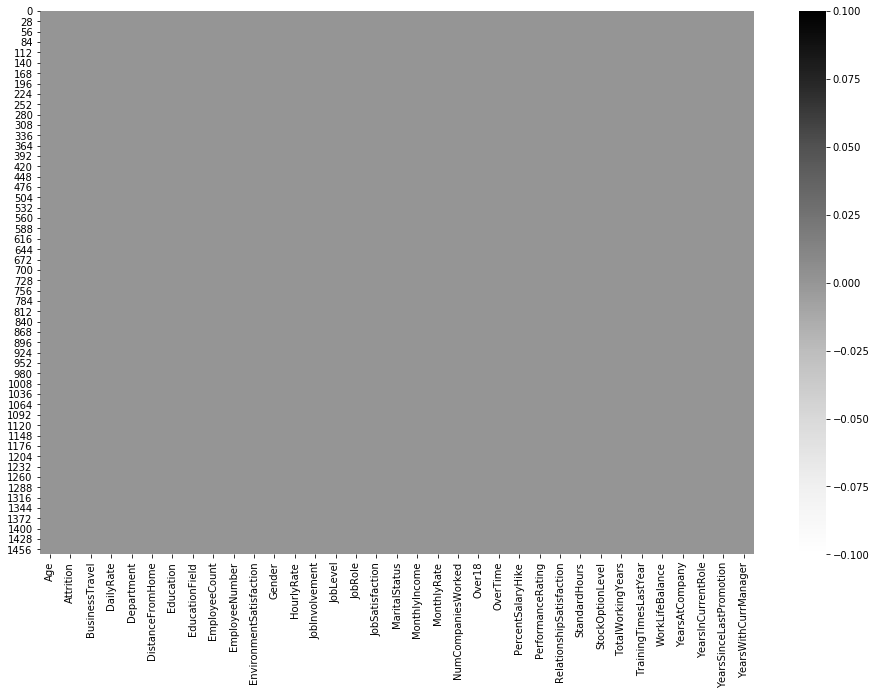

In [9]:
# let's visualize null values presence using heatmap
plt.figure(figsize=(16,10))
sns.heatmap(hr.isnull(),cmap='Greys')

In [10]:
# univariate analysis of continuous type of data presence in the  dataset
# describe function provide  statistics summary of continuous variable.

hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
type(hr)

pandas.core.frame.DataFrame

In [12]:
# let's check how many unique value present in each columns

col= hr.columns.values

#now we check hom many unique values in each columns

list((columns,np.unique(hr[columns].astype(str)).size) for columns in col)


[('Age', 43),
 ('Attrition', 2),
 ('BusinessTravel', 3),
 ('DailyRate', 886),
 ('Department', 3),
 ('DistanceFromHome', 29),
 ('Education', 5),
 ('EducationField', 6),
 ('EmployeeCount', 1),
 ('EmployeeNumber', 1470),
 ('EnvironmentSatisfaction', 4),
 ('Gender', 2),
 ('HourlyRate', 71),
 ('JobInvolvement', 4),
 ('JobLevel', 5),
 ('JobRole', 9),
 ('JobSatisfaction', 4),
 ('MaritalStatus', 3),
 ('MonthlyIncome', 1349),
 ('MonthlyRate', 1427),
 ('NumCompaniesWorked', 10),
 ('Over18', 1),
 ('OverTime', 2),
 ('PercentSalaryHike', 15),
 ('PerformanceRating', 2),
 ('RelationshipSatisfaction', 4),
 ('StandardHours', 1),
 ('StockOptionLevel', 4),
 ('TotalWorkingYears', 40),
 ('TrainingTimesLastYear', 7),
 ('WorkLifeBalance', 4),
 ('YearsAtCompany', 37),
 ('YearsInCurrentRole', 19),
 ('YearsSinceLastPromotion', 16),
 ('YearsWithCurrManager', 18)]

In [13]:
# according above data we have to cross check all these columns "Over18",StandardHours and Employee count to know 
# how many unique values available in these columns.

hr["Over18"].unique()

array(['Y'], dtype=object)

In [14]:
# let's check StandardHours
hr['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [15]:
# let's check Employeecount
hr['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

## As we see above these  columns contain only one value throughtout the dataset.

## So these columns not help us to get right prediction,so we have to drop these column

# Key Observation
- The dataset contains several numerical and categorical columns providing various information on employee's personal and         employment details.
- the dataset don’t have any missing values.
- The dataset contains 1,470 rows and 35 columns.

## Categorical Input Variable Descriptiption:-
- Education
- 1. Below College
- 2. College
- 3. Bachelor
- 4. Master
- 5. Doctor

- EnvironmentSatisfaction
  1. Low
  2. Medium
  3. High
  4. Very High

- JobInvolvement
  1. Low
  2. Medium
  3. High
  4. Very High

- JobSatisfaction
  1. Low
  2. Medium
  3. High
  4. Very High

- PerformanceRating
  1. Low
  2. Good
  3. Excellent
  4. Outstanding

- RelationshipSatisfaction
  1. Low
  2. Medium
  3. High
  4. Very High

- WorkLifeBalance
  1. Bad
  2. Good
  3. Better
  4. Best

## Output /Target Variable :-
- Attrition >- target variable is a binary variable, No (active employee), Yes (former employee). In this study, our target                     variable Y is the probability of an employee leaving the company.

# Statistic Summary Observation:-

- the mean is more than median(50th percentile) in all columns except following columns given below WorkLifeBalance              -   EnvironmentSatisfaction,HourlyRate,JobInvolvement,RelationshipSatisfaction,StockOptionLevel
     TrainingTimesLastYear,
- there is a large difference in 75th -- - percentile and Max in TotalWorkingYear,YearsAtCompany 
- the 1 and 2 observation suggest that there outlier present in these three columns.


In [16]:
type(hr)

pandas.core.frame.DataFrame

In [17]:
# above we see that StandardHours has same value throughout so let's drop it
hr.drop(columns=["StandardHours"],inplace=True)

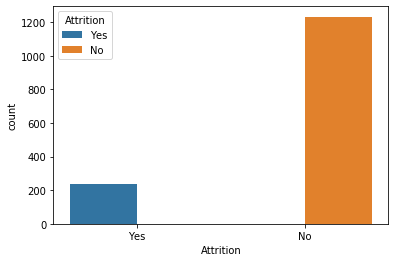

In [18]:
# Let's do some plotting to know how the data columns are distributed in the dataset¶
# univariate data analysis by graphical representation
# firstly we will  plotting Attrition feture with help of counplot 

sns.countplot(x='Attrition',data=hr,hue='Attrition')

# according to below graph formal employees probability is  less followed by active employees.

In [19]:
# let's check in normalize form of target variable
hr['Attrition'].value_counts()
# from the below graph we obseved here out of every 6 employee one employee leaving  job.

No     1233
Yes     237
Name: Attrition, dtype: int64

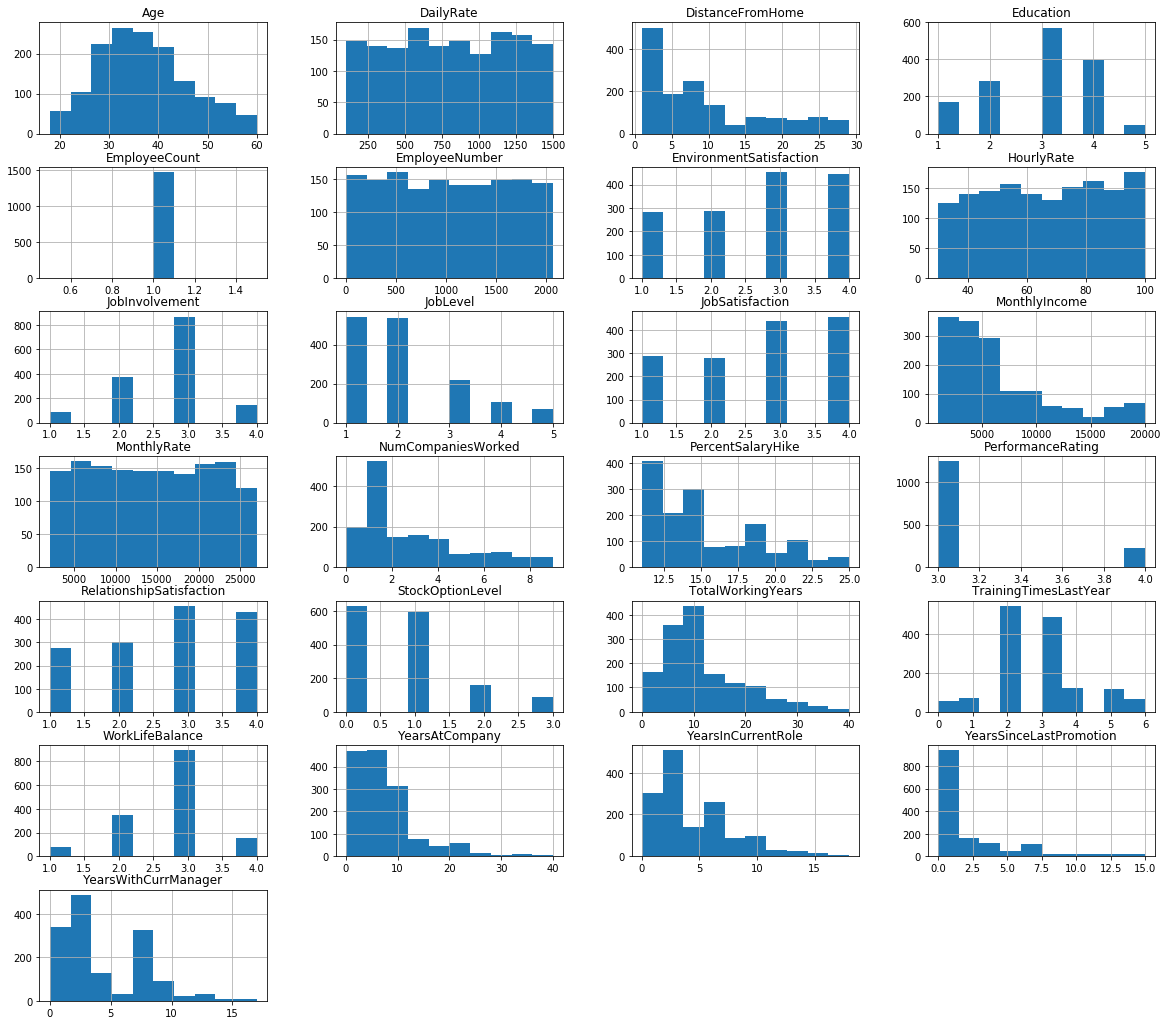

In [20]:
# let's do ploting using histogram to know about numerical variabkles in the dataset whether it is normal distribution or not.
hr.hist(figsize=(20,18),layout=(7,4))
plt.show()

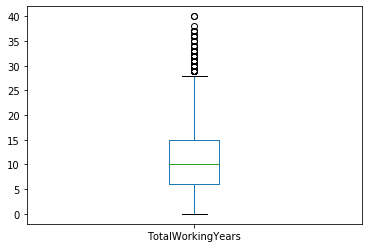

In [21]:
# let's check whether outlier presence or not in the dataset
# for that we have to plot boxplot for cross check to above mentioned column in statistics obervation

hr['TotalWorkingYears'].plot.box()

# as we can see here in TotalWoringYears column has outliers so we need to remove

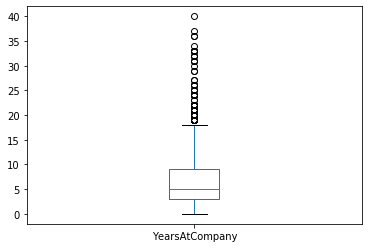

In [22]:
# let's check other varible using boxplot
hr['YearsAtCompany'].plot.box()

# as we can see here in 'YearsAtCompany' column has outliers so we need to remove

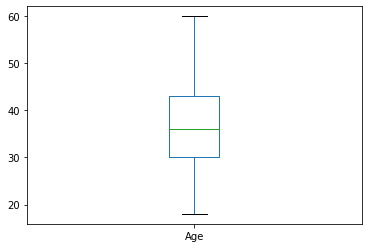

In [23]:
# let's check age column 
# no outliers in age
hr['Age'].plot.box()

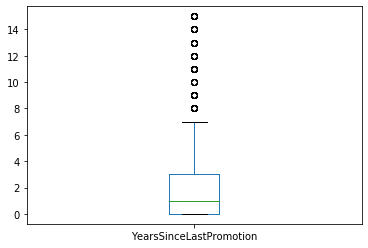

In [24]:
# in this column also has ouliers 
hr['YearsSinceLastPromotion'].plot.box()

In [25]:
# let's check skewness of data using skew() function
hr.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# key observation from histogram and information

- only age  data is  near to normal distributed.
- according to above information, here YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,MonthlyIncome,DistanceFromHome   all these columns highly skewed. 
- we confirme several independent variables are right skewed/positively skewed, so we need to treat those columns and also       required scaling method to transform data in to normal distribution.
- boxplots show many outliers for quite a few columns. so we use Z-score method to find and remove outlier from the all columns   in the dataset.
-  from the above  graph we obseved here StandardHours,EmployeeCount have only one value so it is not useful for model fit so -   we have to remove this.

## Bivariate analysis - tacking two column or two variable and looking the relationship between them,and also find correlation and covariance within two variable¶

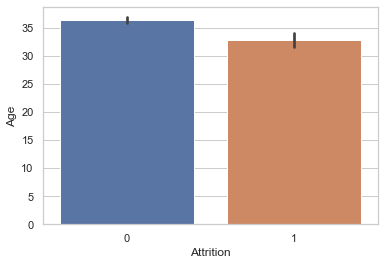

In [169]:
# Target variable is Attrition. So will plot a barplot each column against target variable 
# let's first ploting age with target variable to know what is the average age of active and formal employees.
sns.barplot(x="Attrition",y="Age",data=hr)
plt.show()

# the below graph shows the average age of employees that leaving the job is between 30 to 35
# and the active employees's that average age is above 35 and their ratio is high as compare formal employees

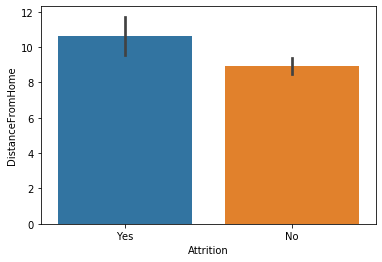

In [27]:
# let's check what is the avaerage distance from home and how it is affect employee attrition

sns.barplot(x="Attrition",y="DistanceFromHome",data=hr)
plt.show()

# the below graph shows the employees attrition probability is high when distance from home is above 10 km.

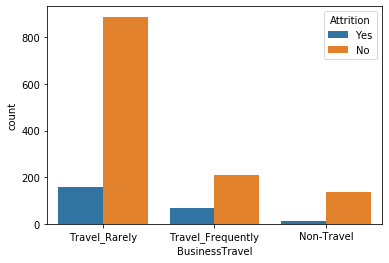

In [28]:
#Lets see the count of each category of buisness travel where employee attrition is true

sns.countplot(x="BusinessTravel",data=hr,hue="Attrition")
plt.show()

#based on below graph we can say that probability of attrition is higher where travel is frequent and where travel_Rarely
# there employees attrition probability is low

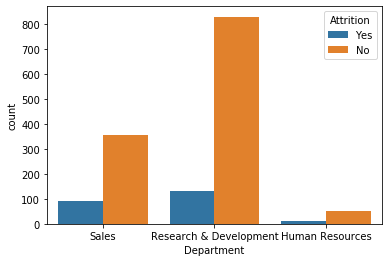

In [29]:
#lets check in which department attrintion is high

sns.countplot(x="Department",data=hr,hue="Attrition")
plt.show()

#based on below graph we say that an employees attrition is high in sales department as compare to R&d department

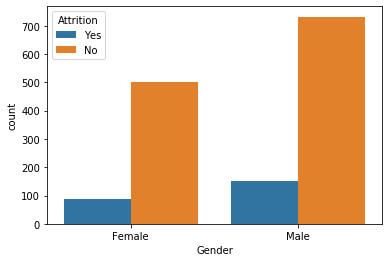

In [30]:
# let's check based on gender what is the attrition ratio
sns.countplot(x="Gender",data=hr,hue="Attrition")
plt.show()

# based on below graph we say that female employees attrition probability is high as compare male employees

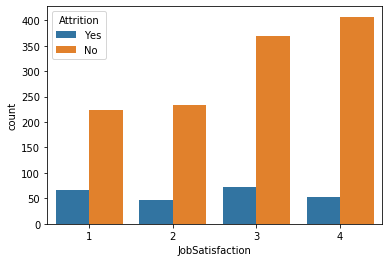

In [31]:
#lets chcek the attrition ratio based on job satisfaction

sns.countplot(x="JobSatisfaction",data=hr,hue="Attrition")
plt.show()

#here we are able  to see that as job satisfaction increases proportion of a leavers decreases 
# so this shows negative correlation with job satisfactrion and attrition

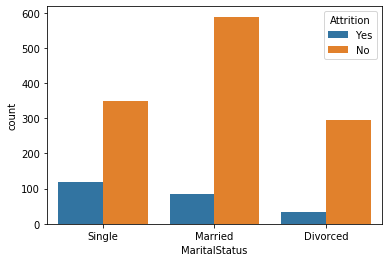

In [32]:
#lets chcek the attrition ratio based on job satisfaction

sns.countplot(x="MaritalStatus",data=hr,hue="Attrition")
plt.show()

# based on below graph we say that Single employees show the largest probability of attrition as compare Married employees 

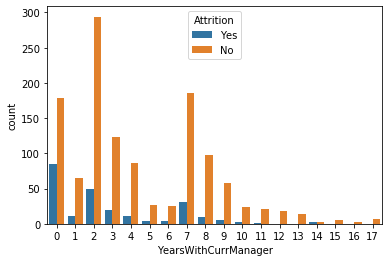

In [33]:
# let's check attrition ratio of current and ex-employees year with current manager
sns.countplot(x="YearsWithCurrManager",data=hr,hue="Attrition")
plt.show()

# based on below graph we say that ex_employee proportion is  high where working year with current manager is 0 and 2 
#as compare to current employees

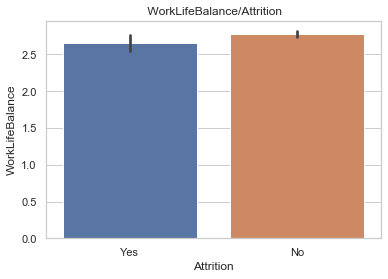

In [34]:
# let's check the work life balance cause of attrition 

sns.set(style='whitegrid')
ax=sns.barplot(x='Attrition',y='WorkLifeBalance', data=hr)
plt.title(" WorkLifeBalance/Attrition")
plt.show()

# it is shows ex-employees worklifebalnce is low as compare to current employees

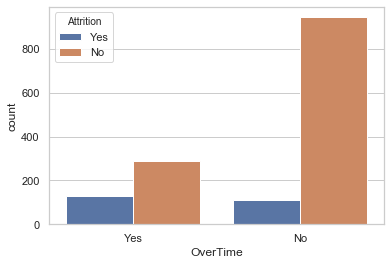

In [35]:
# Let's  check the probability of attrition based on overtime

sns.countplot(x="OverTime",data=hr,hue="Attrition")
plt.show()

#Below graph clearly shows if overtime is there then attrition proportion is higher

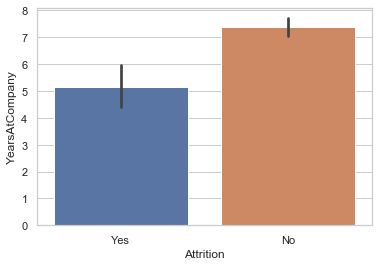

In [36]:
#  let's check Average working years of ex- employees and current employees

sns.barplot(x="Attrition",y="YearsAtCompany",data=hr)
plt.show()

# based on bar graph we say that attrition proportion is high if employees working less then 6 years

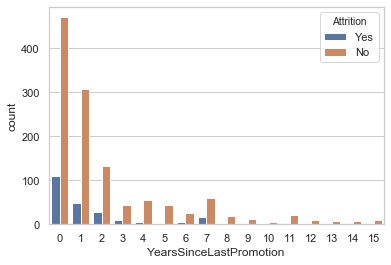

In [37]:
#Lets check average of Attrition over year since last promotion 

sns.countplot(x="YearsSinceLastPromotion",data=hr,hue="Attrition")
plt.show()

# # based on below graph we say that Attrition proportion is high where since last promotion yearss between 0 to 1
#as compare to current employees

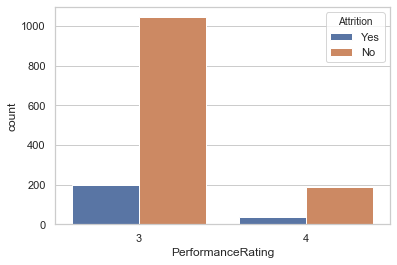

In [38]:
#Now lets check how performnce rating is afecting attrition level
sns.countplot(x="PerformanceRating",data=hr,hue='Attrition')
plt.show()

#base on below graph say that employees attrition is high where the employees getting performance rating 3 or low.

In [39]:
#Lets drop EmployeeCount column
hr.drop(columns=["EmployeeCount"],inplace=True)

In [40]:
# lets drop over18 column because it also contain sam,e value throught column
hr.drop(columns=["Over18"],inplace=True)

In [41]:
#there is  column employe number in the dataset that we can drop as it does not helps so we drop
hr.drop(columns=["EmployeeNumber"],inplace=True)

In [42]:
type(hr)

pandas.core.frame.DataFrame

In [43]:
#Now lets assign a labels to our attrition varible
# yes becomes 1 and no becomes 0

from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
hr['Attrition'] = la.fit_transform(hr['Attrition'])

In [44]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [45]:
 # now we will use correlation matrix to know correlation streanth between input and target variables
    
hrdata=hr.corr()
hrdata

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


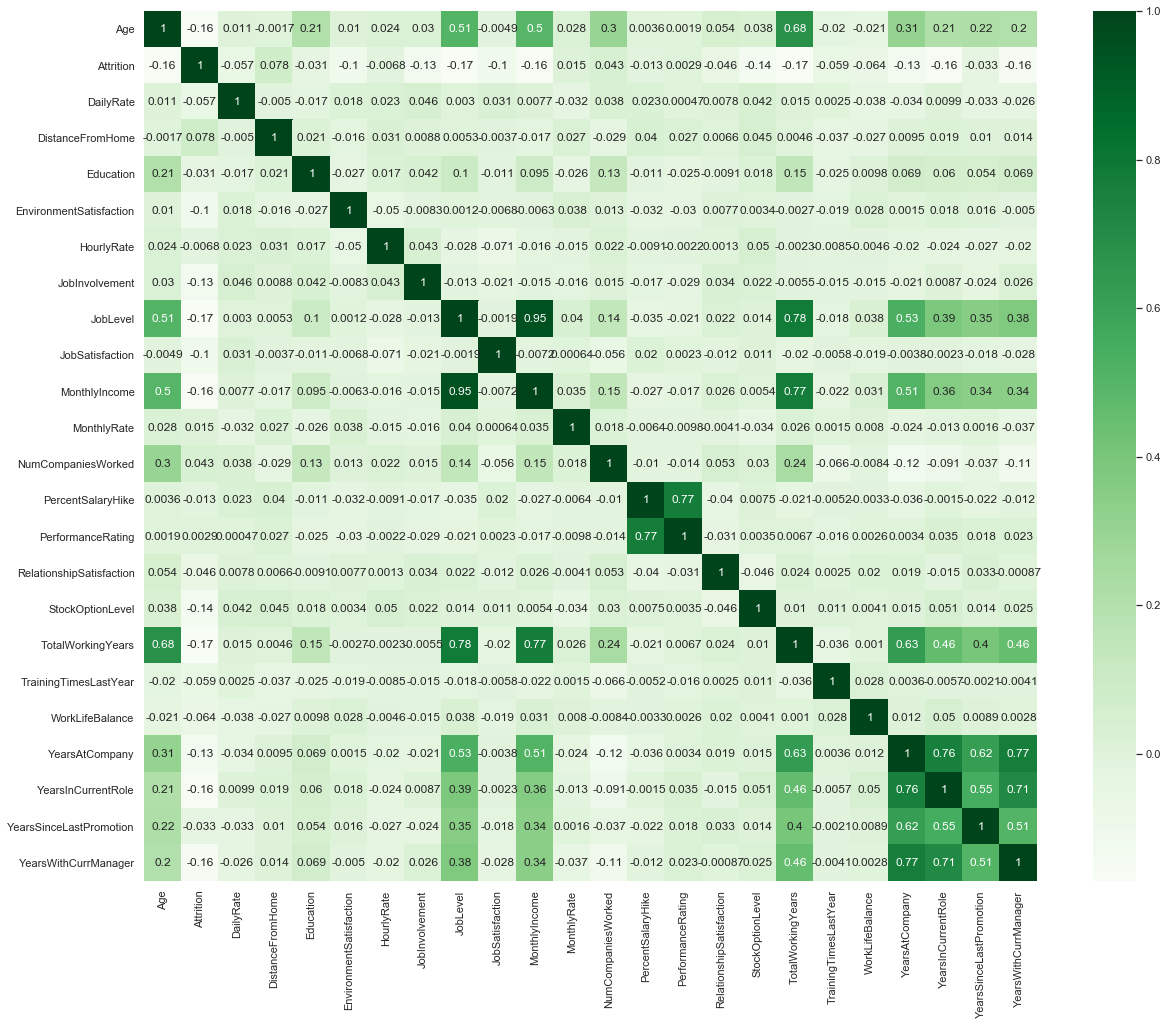

In [46]:
plt.figure(figsize=(20,16))
sns.heatmap(hrdata,cmap='Greens',annot=True) 

# key observation from correlation matrix and heatmap :-

- dark shades are highly correlated with each other.

- from above observation we can say that Performance Rating, Monthly Rate, NumCompaniesWorked, Distance From Home is highly       positive correlated with target variable.

- from above observation we can say that Total Working Years, Job Level, Years In Current Role, and Monthly Income is highly      negative correlated with target variable.

- job level is highly positive correlated with monthlyincome followed by yearsAtCompany,yearsCurrentRole


In [54]:
# let's transform all object dtypes varible in label using Label Encoder
la = LabelEncoder()

hr['EducationField'] = la.fit_transform(hr['EducationField'])
hr['BusinessTravel'] = la.fit_transform(hr['BusinessTravel'])
hr['Department'] = la.fit_transform(hr['Department'])
hr['Gender'] = la.fit_transform(hr['Gender'])
hr['MaritalStatus'] = la.fit_transform(hr['MaritalStatus'])
hr['OverTime']      = la.fit_transform(hr['OverTime'])
hr['JobRole']      = la.fit_transform(hr['JobRole'])



In [55]:
# let's remove outliers in the hr dataset using z-score method

from scipy.stats import zscore

z_score=abs(zscore(hr))
print(hr.shape)
hr=hr.loc[(z_score<3).all(axis=1)]
print(hr.shape)

# we can see  below 1387 rows and 31 columns are present after removing ouliers fron wine dataset.¶

(1387, 31)
(1304, 31)


In [89]:
#Now seperate the dataset as input variable and output variabes

x = hr.drop('Attrition', axis = 1)
y = hr['Attrition']

In [90]:
# let's treat skewness of dataset 

for feature in x.columns:
    if x.skew().loc[feature]>0.5:
        x[feature]=np.log1p(x[feature])
    

In [91]:
# let's see whether skewness remove 
x.skew()

Age                        -0.062849
BusinessTravel             -1.414592
DailyRate                  -0.014199
Department                  0.177341
DistanceFromHome           -0.063919
Education                  -0.279545
EducationField             -0.043023
EnvironmentSatisfaction    -0.319471
Gender                     -0.427052
HourlyRate                 -0.032833
JobInvolvement             -0.496090
JobLevel                    0.399772
JobRole                    -0.415162
JobSatisfaction            -0.335845
MaritalStatus              -0.173388
MonthlyIncome               0.250068
MonthlyRate                 0.039330
NumCompaniesWorked          0.109607
OverTime                    0.960516
PercentSalaryHike           0.490091
PerformanceRating           1.942566
RelationshipSatisfaction   -0.275672
StockOptionLevel            0.280938
TotalWorkingYears          -0.828744
TrainingTimesLastYear      -1.027646
WorkLifeBalance            -0.545492
YearsAtCompany             -0.484569
Y

In [92]:
# let's check shape x and y
print(x.shape)
print(y.shape)

(1304, 30)
(1304,)


In [93]:
#Applying Standard scaling to get optimized result
#Lets bring features to common scale 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_x = sc.fit_transform(x)
df_x =pd.DataFrame(df_x,columns=x.columns)

In [94]:
df_x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.684158,0.596575,0.740463,1.396342,-1.525069,-0.868756,-0.962611,-0.662385,-1.235772,1.386327,...,-0.423112,-1.564940,-1.047729,0.038000,-3.402812,-2.479904,0.377442,0.417662,-0.946478,0.679494
1,1.423531,-0.899452,-1.310371,-0.502333,0.238949,-1.846201,-0.962611,0.256498,0.809211,-0.239100,...,2.363442,1.211498,0.466966,0.350755,0.292174,0.336990,1.044367,1.034885,0.033793,1.049011
2,0.259738,0.596575,1.415768,-0.502333,-1.049530,-0.868756,1.231113,1.175380,0.809211,1.287816,...,-0.423112,-0.639461,-1.047729,-0.145570,0.292174,0.336990,-2.493837,-1.695899,-0.946478,-1.621955
3,-0.211931,-0.899452,1.463114,-0.502333,-0.712129,1.086133,-0.962611,1.175380,-1.235772,-0.485377,...,-0.423112,0.286019,-1.047729,0.038000,0.292174,0.336990,0.748268,1.034885,1.014064,-1.621955
4,-1.035281,0.596575,-0.532898,-0.502333,-1.049530,-1.846201,0.696877,-1.581267,0.809211,-1.273463,...,-0.423112,1.211498,0.466966,-0.353685,0.292174,0.336990,-0.872784,-0.253169,0.607215,-0.210828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,0.146647,-0.899452,0.197229,-0.502333,1.389290,-0.868756,0.696877,0.256498,0.809211,-1.224207,...,-0.423112,0.286019,0.466966,1.118303,0.292174,0.336990,0.149986,-0.253169,-0.946478,0.158689
1300,0.477256,0.596575,-0.478076,-0.502333,-0.055798,-1.846201,0.696877,1.175380,0.809211,-1.174952,...,-0.423112,-1.564940,0.466966,0.202210,1.372888,0.336990,0.574474,1.034885,0.033793,1.049011
1301,-1.035281,0.596575,-1.619366,-0.502333,-0.450421,0.108688,-0.962611,-0.662385,0.809211,1.041539,...,2.363442,-0.639461,0.466966,-0.353685,-3.402812,0.336990,0.377442,-0.253169,-0.946478,0.158689
1302,1.423531,-0.899452,0.543603,1.396342,-1.049530,0.108688,0.696877,1.175380,0.809211,-0.140589,...,-0.423112,1.211498,-1.047729,1.118303,0.292174,-1.071457,0.903732,0.859527,-0.946478,1.200299


In [155]:
# Since we have target imbalance so we focus roc_auc_score and cross validation score
# Train and Test splitting of data 

df_x_train, df_x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.20, random_state = 42)  

In [156]:
print(df_x_train.shape)
print(y_train.shape)

(1043, 30)
(1043,)


In [157]:
print(df_x_test.shape)
print(y_test.shape)

(261, 30)
(261,)


# Our training and testing data is ready now to perform machine learning algorithm¶

## the employees attrition  is a standard supervised classification problem , so we can use Multiple classification algorithm with hyperparameter tune.

- first we use Logistic regression model because the target variable hold binary classification (0 and 1) to check auc_roc       score       level.
- we also used different classification model to check and compare whether we get high accuracy score or not, this exercise       help us to select best model.
- as we know our data is imbalance so we go with cross validation score

##  We will use the following algorithms

- Logistic Regression
- knn
- Random Forests
- SVM
- roc_auc score


In [158]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def max_accuracyscore(mod,df_x,y):
    max_accuracy_score=0
    for r_state in range(42,100):
        df_x_train, df_x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.22, random_state = r_state)  
        mod.fit(df_x_train,y_train)
        y_pred = mod.predict(df_x_test)
        a_score=accuracy_score(y_test,y_pred)
        if a_score>max_accuracy_score:
            max_accuracy_score=a_score
            final_r_state=r_state
    print("max Accuracy_Score corresponding to ",final_r_state," is ",max_accuracy_score)
    return final_r_state

In [159]:
#Lets use logistic regression and check 
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
max_accuracyscore(lg,df_x,y)

max Accuracy_Score corresponding to  46  is  0.9094076655052264


46

In [149]:
# Lets use cross validation metod to get cross val score because target varible is imbalanced
from sklearn.model_selection import cross_val_score

print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg,df_x,y,cv=5,scoring="accuracy"))

# as we see below we get lesser r2 score 88% by cross val method as compare to train_test_split method

Mean accuracy score for Logistic Regression:  0.8719422340111997
standard deviation in accuracy score for Logistic Regression:  0.007355131509490868


cross val accuracy score: [0.8697318  0.8697318  0.86206897 0.87356322 0.88461538]


In [150]:
#Lets use KNN
#For KNN we need to know the best value of n_neighbors using grid search

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
Gv = GridSearchCV(knn, neighbors, cv=5,scoring="accuracy")
Gv.fit(x,y)
Gv.best_params_

{'n_neighbors': 14}

In [119]:
knn =KNeighborsClassifier(n_neighbors=14)
max_accuracyscore(knn,df_x,y)

max Accuracy_Score corresponding to  99  is  0.8850574712643678


99

In [120]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for KNeighbors: ",cross_val_score(knn,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Kneighbors: ",cross_val_score(knn,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(knn,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for KNeighbors:  0.8374211612142647
standard deviation in accuracy score for Kneighbors:  0.007151593876605355


cross val accuracy score: [0.83141762 0.83908046 0.83141762 0.85057471 0.83461538]


In [121]:
# lets check RandomForest algorithm
# for this we have to find best n_estimators
from sklearn.ensemble import RandomForestClassifier

parameters={"n_estimators":[10,100,500]}
rf =RandomForestClassifier()
gv = GridSearchCV(rf, parameters, cv=5,scoring="accuracy")
gv.fit(df_x,y)
gv.best_params_

{'n_estimators': 100}

In [122]:
rf=RandomForestClassifier(n_estimators=100)
max_accuracyscore(rf,df_x,y)

max Accuracy_Score corresponding to  99  is  0.9118773946360154


99

In [123]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for Random Forest Classifier: ",cross_val_score(rf,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Random Forest: ",cross_val_score(rf,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(rf,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for Random Forest Classifier:  0.848927203065134
standard deviation in accuracy score for Random Forest:  0.010076445171703018


cross val accuracy score: [0.8467433  0.8697318  0.8467433  0.85440613 0.83846154]


In [124]:
#Lets use SVM model
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gv = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
gv.fit(df_x,y)
gv.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [125]:
svc=SVC(kernel="linear",C=0.1)
max_accuracyscore(svc,df_x,y)


max Accuracy_Score corresponding to  99  is  0.9080459770114943


99

In [126]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for SVC: ",cross_val_score(svc,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for SVC: ",cross_val_score(svc,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(svc,df_x,y,cv=5,scoring="accuracy"))

Mean accuracy score for SVC:  0.8704008252284116
standard deviation in accuracy score for SVC:  0.01144431176796668


cross val accuracy score: [0.86590038 0.88122605 0.85057471 0.88122605 0.87307692]


In [127]:
# let's draw roc_auc_curve
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob=lg.predict_proba(df_x_test)[:,1]

#predict_proba function will take test data and try to predict internaly the higher level of queue of given test data


In [128]:
y_pred_prob # it give you particular measurement of data

array([6.67703073e-02, 1.24162666e-01, 3.73884449e-03, 1.22630298e-01,
       3.51931661e-01, 7.66479759e-03, 1.71456309e-01, 4.54081039e-02,
       6.45439302e-01, 2.58553991e-02, 8.49013624e-01, 9.54410572e-02,
       4.41931013e-02, 1.73746570e-02, 1.69413565e-02, 3.62213692e-01,
       5.08444011e-01, 9.05882286e-02, 3.39308969e-01, 1.12699204e-01,
       3.57081377e-02, 3.77297685e-02, 7.25586430e-01, 6.03792032e-01,
       2.74577210e-02, 8.80065328e-02, 2.09568372e-01, 1.07377543e-03,
       5.90126035e-01, 1.00770183e-02, 5.27879712e-03, 5.72403565e-01,
       2.95505293e-01, 2.22531150e-01, 3.95311907e-01, 4.09116919e-01,
       3.66618918e-01, 2.62427204e-01, 6.07342726e-02, 2.23553909e-01,
       2.89026305e-01, 1.35218722e-01, 6.98487839e-02, 7.62719705e-03,
       1.82229012e-02, 4.64317294e-02, 5.87642274e-04, 2.07164197e-02,
       2.04335866e-01, 1.63911877e-02, 3.44444622e-02, 1.88812770e-01,
       1.80521752e-01, 2.17149025e-02, 5.24026103e-01, 2.59444233e-01,
      

In [129]:
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob) # text actual with predicted probality y

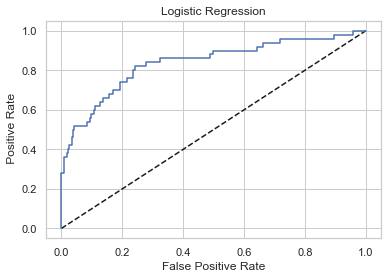

In [130]:
y_pred_prob=lg.predict_proba(df_x_test)[:,1]
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel(' Positive Rate')
plt.title('Logistic Regression')
plt.show()

## I used multiple algorithms to  get high accuracy score corresponding to random state and cross validation tune.

- we seen till now Logistic classifier is  best model as comparision to other model which are apply in this  because we got max   cross_val accuracy score and also give good accuracy at random state 98

- So we save Logistic Regression Model for production.


In [165]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state =98,test_size=0.20)
lg = LogisticRegression()
lg.fit(df_x_train,y_train)
y_pred=lg.predict(df_x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

Confusion matrix 
 [[217   1]
 [ 43   0]]
classification report 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       218
           1       0.00      0.00      0.00        43

    accuracy                           0.83       261
   macro avg       0.42      0.50      0.45       261
weighted avg       0.70      0.83      0.76       261



In [163]:
print("Mean accuracy score for KNeighbors: ",cross_val_score(lg,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Kneighbors: ",cross_val_score(lg,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for KNeighbors:  0.8719422340111997
standard deviation in accuracy score for Kneighbors:  0.007355131509490868


cross val accuracy score: [0.8697318  0.8697318  0.86206897 0.87356322 0.88461538]


In [160]:
# let's check roc_auc score and save
auc_score= roc_auc_score(y_test,lg.predict(df_x_test))
auc_score

0.7403169014084506

In [166]:
from sklearn.externals import joblib
# save the model as a pickle in a file
joblib.dump(lg,'Hr_analytic.pkl')

['Hr_analytic.pkl']